# 303220201025
# Besime KOÇDEVİREN

# KNN : K-Nearest Neighbor Algorithm

Train dataset olarak verdiğiniz kısmı modelimi eğitmek için kullandım.
Oluşturduğum knn modelini verdiğiniz Test datasetinin üzerinde denedim.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Train Dataset
* Train datası import edildi
* Yanlış formattaki datalar temizlendi
* String degerler integer a dönüştürüldü
* age ve location özelliklerine göre plot çizdirildi
* normalization yapıldı
* data split edildi
* k-fold cross validation(k=10) ile data faklı kombinasyonlarla eğitildi, ortalama accuracy bulundu.
* knn modeli k=3 ve eclidean distance göre fit edildi.
* train dataseti içinden oluşturulan test datasıyla prediction yapıldı, accuracy bulundu.

In [2]:
data_train = pd.read_excel("train_set.xlsx")
data_train

,location,gender,age,visiting_Wuhan,from_Wuhan,death
0,"Shenzhen, Guangdong",male,66.0,1.0,0.0,0
1,Shanghai,female,56.0,0.0,1.0,0
2,Zhejiang,male,46.0,0.0,1.0,0
3,Tianjin,female,60.0,1.0,0.0,0
4,Tianjin,male,58.0,0.0,0.0,0
...,...,...,...,...,...,...
3358,Basal-Stadt,female,NaN,0.0,0.0,0
3359,Basal-Stadt,male,23.0,0.0,0.0,0
3360,Basal-Stadt,NaN,NaN,NaN,NaN,NaN
3361,Basal-Stadt,23,NaN,NaN,NaN,NaN


In [3]:
data_train.gender.unique()

array(['male', 'female', nan, 20, 23], dtype=object)

In [4]:
data_train = data_train[data_train["gender"].isin(["male","female"])]
data_train.gender.unique()

array(['male', 'female'], dtype=object)

In [5]:
data_train.gender = [1 if each == "male" else 0 for each in data_train.gender]
data_train.gender.unique()

C:\Users\BESIME\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([1, 0], dtype=int64)

In [6]:
data_train.location.unique()

array(['Shenzhen, Guangdong', 'Shanghai', 'Zhejiang', 'Tianjin',
       'Chongqing', 'Sichuan', 'Beijing', 'Shandong', 'Yunnan', 'Jiangxi',
       'Macau', 'Liaoning', 'Fujian', 'Guizhou', 'Shanxi', 'Ningxia',
       'Guangxi', 'Henan', 'Hebei', 'Wuhan, Hubei', 'Hunan', 'Gansu',
       'Heilongjiang', 'Xinjiang', 'Hubei', 'Inner Mongolia', 'Shaanxi',
       'Hechi, Guangxi', 'Jilin', 'Bordeaux', 'Paris', 'Annecy', 'Amiens',
       'Strasbourg', 'Lile', 'Nantes', 'Montpellier', 'Brest', 'Dijon',
       'Lyon', 'Bois-Guillaume', 'Nice', 'Landes', 'Pays de la Loire',
       'Pays', 'Guadeloupe', 'Kanagawa', 'Tokyo', 'Aichi Prefecture',
       'Nara Prefecture', 'Hokkaido', 'Osaka Prefecture', 'Mie', 'Japan',
       'Kyoto', 'Haneda', 'Wakayama Prefecture', 'Chiba Prefecture',
       'Okinawa Prefecture', 'Sagamihara', 'Sapporo', 'Nagoya City',
       'Fukuoka Prefecture', 'Ishikawa', 'Kumamoto City',
       'Kumamoto Prefecture', 'Nagano Prefecture', 'Gifu Prefecture',
       'Sagamihara 

In [7]:
#data_train.location.unique().reshape(-1,1)
location1 = pd.DataFrame({'location': data_train.location.unique(),
                          'location_id': np.arange(data_train.location.nunique())})
location1

,location,location_id
0,"Shenzhen, Guangdong",0
1,Shanghai,1
2,Zhejiang,2
3,Tianjin,3
4,Chongqing,4
...,...,...
202,Aargau,202
203,Zurich,203
204,Vaud,204
205,Basal-Stadt,205


In [8]:
#data_train["location_label"] = data_train["location"]

In [9]:
for index, row in location1.iterrows():
    data_train["location"] = np.where((data_train.location == location1.location[index]), location1.location_id[index], data_train.location)
        
data_train


C:\Users\BESIME\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,gender,age,visiting_Wuhan,from_Wuhan,death
0,0,1,66.0,1.0,0.0,0
1,1,0,56.0,0.0,1.0,0
2,2,1,46.0,0.0,1.0,0
3,3,0,60.0,1.0,0.0,0
4,3,1,58.0,0.0,0.0,0
...,...,...,...,...,...,...
3356,203,0,30.0,0.0,0.0,0
3357,204,1,49.0,0.0,0.0,0
3358,205,0,NaN,0.0,0.0,0
3359,205,1,23.0,0.0,0.0,0


In [10]:
data_train.death.unique()

array([0, 1, '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/23/2020', '2/24/2020', '2/22/2020', '2/25/2020',
       '2/29/2020', 43833, nan, 43893, 44077, 43985, 44046, 43924, 44107,
       44138, 44168, 43832], dtype=object)

In [11]:
data_train = data_train[data_train["death"].isin([0,1])]
data_train.death.unique()

array([0, 1], dtype=object)

In [12]:
data_train.visiting_Wuhan.unique()

array([1., 0.])

In [13]:
data_train.from_Wuhan.unique()

array([ 0.,  1., nan])

In [14]:
data_train = data_train[data_train["from_Wuhan"].isin([0,1])]
data_train.from_Wuhan.unique()

array([0., 1.])

In [15]:
# drop rows with missing values
data_train.dropna(inplace=True)
data_train

,location,gender,age,visiting_Wuhan,from_Wuhan,death
0,0,1,66.0,1.0,0.0,0
1,1,0,56.0,0.0,1.0,0
2,2,1,46.0,0.0,1.0,0
3,3,0,60.0,1.0,0.0,0
4,3,1,58.0,0.0,0.0,0
...,...,...,...,...,...,...
3351,201,1,28.0,0.0,0.0,0
3355,202,1,26.0,0.0,0.0,0
3356,203,0,30.0,0.0,0.0,0
3357,204,1,49.0,0.0,0.0,0


In [16]:
# Import LabelEncoder
#from sklearn import preprocessing
#creating labelEncoder
#le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
#data_train.location=le.fit_transform(data_train.location)
#data_train.gender =le.fit_transform(data_train.gender)
# drop rows wrong format for death feature
#data_train

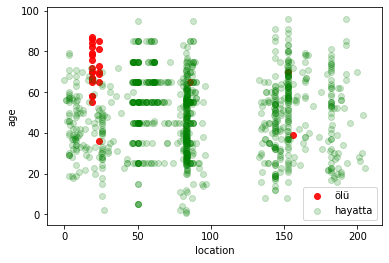

In [17]:
#%%scatter plot
D = data_train[data_train.death == 1]
C = data_train[data_train.death == 0]
plt.scatter(D.location, D.age, color="red",label="ölü", alpha=0.9)
plt.scatter(C.location, C.age, color="green",label="hayatta",alpha=0.2)
plt.xlabel("location")
plt.ylabel("age")
plt.legend()#labellarımızı göstermemizi sağlar
plt.show()

In [18]:
y = data_train.death.values
x_data = data_train.drop(["death"], axis=1)

In [19]:
#%% normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,location,gender,age,visiting_Wuhan,from_Wuhan
0,0,1.0,0.685864,1.0,0.0
1,0.00487805,0.0,0.581152,0.0,1.0
2,0.0097561,1.0,0.476440,0.0,1.0
3,0.0146341,0.0,0.623037,1.0,0.0
4,0.0146341,1.0,0.602094,0.0,0.0
...,...,...,...,...,...
3351,0.980488,1.0,0.287958,0.0,0.0
3355,0.985366,1.0,0.267016,0.0,0.0
3356,0.990244,0.0,0.308901,0.0,0.0
3357,0.995122,1.0,0.507853,0.0,0.0


In [20]:
#%% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42)#aynı randomlıkta böl demek random state
x_train = x_train.astype('double')
y_train = y_train.astype('double')
x_test = x_test.astype('double')
y_test = y_test.astype('double')

In [21]:
#%%knn modeli
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)#k=3,metric='minkowski', p=2 default gelir bunlarda standard Euclidean metric demektir
KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
#%% k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)
print("average accuracy: ", np.mean(accuracies))
print("average std: ", np.std(accuracies))


average accuracy:  0.9824684684684686
average std:  0.013591856989177467


In [23]:
#%% test
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print("{} nn score : {} ".format(3, knn.score(x_test,y_test)))
prediction

3 nn score : 0.9686520376175548 


array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Test Dataset
* Test datası import edildi
* Yanlış formattaki datalar temizlendi
* String degerler integer a dönüştürüldü
* age ve location özelliklerine göre plot çizdirildi
* Normalization yapıldı
* Yukarıda fit ettiğimiz knn modeli modeline göre prediction yapıldı.
* Predictionlarımıza göre confusion matrix çizildi.
* NearestNeighbors indexleri bulundu.

In [24]:
data_test = pd.read_excel("test_set.xlsx")
data_test

,location,gender,age,visiting_Wuhan,from_Wuhan,death_true
0,Beijing,female,33.0,0,1,0
1,Beijing,female,33.0,0,1,0
2,Jiangsu,male,37.0,1,0,0
3,Heilongjiang,male,69.0,1,0,0
4,Guangxi,male,63.0,0,1,0
5,Guangxi,female,62.0,0,1,0
6,Guangxi,male,49.0,0,1,0
7,Sichuan,male,50.0,1,0,0
8,Sichuan,male,48.0,1,0,0
9,Sichuan,male,36.0,1,0,0


In [25]:
# drop rows with missing values
data_test.dropna(inplace=True)

In [26]:
data_test.gender = [1 if each == "male" else 0 for each in data_test.gender]
data_test.gender.unique()

array([0, 1], dtype=int64)

In [27]:
# drop rows wrong format for death feature
data_test = data_test[data_test["death_true"].isin([0,1])]

In [28]:
for index, row in location1.iterrows():
    data_test["location"] = np.where((data_test.location == location1.location[index]), location1.location_id[index], data_test.location)
        
#data_test

In [29]:
E = data_test[data_test.death_true == 1]
F = data_test[data_test.death_true == 0]

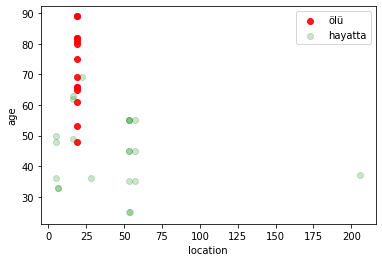

In [30]:
#%%scatter plot
plt.scatter(E.location, E.age, color="red",label="ölü", alpha=0.9)
plt.scatter(F.location, F.age, color="green",label="hayatta",alpha=0.2)
plt.xlabel("location")
plt.ylabel("age")
plt.legend()#labellarımızı göstermemizi sağlar
plt.show()

In [31]:
y_data_test = data_test.death_true.values.reshape(-1,1)
#y_data_test

In [32]:
x_data_test = data_test.drop(["death_true"],axis = 1)
#x_data_test

In [33]:
#%% normalization
x_data_test = (x_data_test - np.min(x_data_test))/(np.max(x_data_test)-np.min(x_data_test))
x_data_test = x_data_test.astype('double')
x_data_test.head()

,location,gender,age,visiting_Wuhan,from_Wuhan
0,0.004975,0.0,0.12500,0.0,1.0
1,0.004975,0.0,0.12500,0.0,1.0
2,1.000000,1.0,0.18750,1.0,0.0
3,0.084577,1.0,0.68750,1.0,0.0
4,0.054726,1.0,0.59375,0.0,1.0


In [34]:
#%% 
prediction2 = knn.predict(x_data_test)
print("{} nn score : {} ".format(3, knn.score( x_data_test,y_data_test)))
prediction2

3 nn score : 0.8055555555555556 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [35]:
for index, row in location1.iterrows():
    data_test["location"] = np.where((data_test.location == location1.location_id[index]), location1.location[index], data_test.location)

In [36]:
data_test["death_estimation"] = prediction2.astype(int)
#data_test

# Confusion Matrix

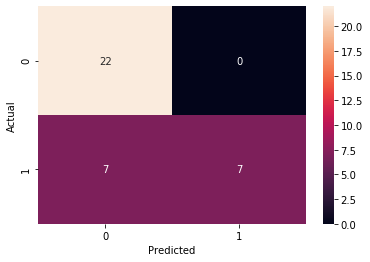

In [37]:
df = pd.DataFrame(data_test, columns=['death_true','death_estimation'])
confusion_matrix = pd.crosstab(df['death_true'], df['death_estimation'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

# NearestNeighbors

In [38]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(x_data_test.values)
NearestNeighbors(n_neighbors=3)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [39]:
#print(neigh.kneighbors(x_data_test.values))
distances, indices = neigh.kneighbors(x_data_test.values)
#indices

In [40]:
data_test["knn_index"] = "["
data_test["knn_index"]+= indices[:, 0].astype("str")
data_test["knn_index"]+= ","
data_test["knn_index"]+= indices[:, 1].astype("str")
data_test["knn_index"]+= ","
data_test["knn_index"]+= indices[:, 2].astype("str")
data_test["knn_index"]+= "]"

In [41]:
data_test["age"] = data_test["age"].astype(int)

# Quiz2 Sonucu

In [42]:
data_test

,location,gender,age,visiting_Wuhan,from_Wuhan,death_true,death_estimation,knn_index
0,Beijing,0,33,0,1,0,0,"[0,1,17]"
1,Beijing,0,33,0,1,0,0,"[0,1,17]"
2,Jiangsu,1,37,1,0,0,0,"[2,26,25]"
3,Heilongjiang,1,69,1,0,0,0,"[3,7,8]"
4,Guangxi,1,63,0,1,0,0,"[4,22,11]"
5,Guangxi,0,62,0,1,0,0,"[5,17,23]"
6,Guangxi,1,49,0,1,0,0,"[6,24,11]"
7,Sichuan,1,50,1,0,0,0,"[7,8,9]"
8,Sichuan,1,48,1,0,0,0,"[8,7,9]"
9,Sichuan,1,36,1,0,0,0,"[9,8,7]"


# Not:

* Projeyi: Jupiter Notebook kullanarak, python dilinde kodladım.
* Quiz2 açıklamasında, excel sonucunu ve kodları metin olarak istediğinizi belirttiğiniz için projemi yukarıdaki formatta teslim ediyorum. Eğer yanlış anladıysam, talep ettiğinizde maille ilgili kodları ve kullanılan datasetleri gönderebilirim.
  İyi Çalışmalar